EDA

In [205]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [206]:
waiting_time_df = pd.read_csv('data/waiting_times.csv')
attendance_df = pd.read_csv('data/attendance.csv')
entity_df = pd.read_csv('data/entity_schedule.csv')
link_attraction_park_df = pd.read_csv('data/link_attraction_park.csv', sep=';')
weather_df = pd.read_csv('data/weather_data.csv')


In [207]:
link_attraction_park_df.head()

,ATTRACTION,PARK
0,Aeroplane Ride,Tivoli Gardens
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
4,Crazy Bus,Tivoli Gardens


In [208]:
# Merge link attraction park and entity schedule
merge_1 = pd.merge(entity_df, link_attraction_park_df, left_on='ENTITY_DESCRIPTION_SHORT', right_on='ATTRACTION' , how='inner')
merge_1.head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,ATTRACTION,PARK
0,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07,Dizzy Dropper,PortAventura World
1,NaN,Dizzy Dropper,ATTR,2018-12-29 08:00:00.000,2018-12-29 21:26:00.000,2018-12-30 07:29:36.000,2018-12-29,Dizzy Dropper,PortAventura World
2,NaN,Dizzy Dropper,ATTR,2019-03-18 08:30:00.000,2019-03-18 19:14:00.000,2019-03-19 07:46:24.000,2019-03-18,Dizzy Dropper,PortAventura World
3,NaN,Dizzy Dropper,ATTR,2019-01-06 08:00:00.000,2019-01-06 20:13:00.000,2019-01-07 07:36:26.000,2019-01-06,Dizzy Dropper,PortAventura World
4,NaN,Dizzy Dropper,ATTR,2020-01-17 08:30:00.000,2020-01-17 17:30:00.000,2020-01-18 07:38:20.000,2020-01-17,Dizzy Dropper,PortAventura World


In [209]:
# Merge attendance and merge_1
merge_2 = pd.merge(attendance_df, merge_1, left_on=['USAGE_DATE' , 'FACILITY_NAME'], right_on=['WORK_DATE' , 'PARK'] , how='inner')
merge_2.head()

,USAGE_DATE,FACILITY_NAME,attendance,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,ATTRACTION,PARK
0,2018-06-01,PortAventura World,46804,NaN,Dizzy Dropper,ATTR,2018-06-01 08:30:00.000,2018-06-01 22:14:00.000,2018-06-02 08:08:17.000,2018-06-01,Dizzy Dropper,PortAventura World
1,2018-06-01,PortAventura World,46804,NaN,Kiddie Coaster,ATTR,2018-06-01 10:00:00.000,2018-06-01 20:01:00.000,2018-06-02 08:08:18.000,2018-06-01,Kiddie Coaster,PortAventura World
2,2018-06-01,PortAventura World,46804,Fermeture Opérationnelle,Oz Theatre,ATTR,2018-06-01 23:59:00.000,2018-06-01 23:59:00.000,2018-06-02 08:08:14.000,2018-06-01,Oz Theatre,PortAventura World
3,2018-06-01,PortAventura World,46804,NaN,Free Fall,ATTR,2018-06-01 10:00:00.000,2018-06-01 20:06:00.000,2018-06-02 08:08:21.000,2018-06-01,Free Fall,PortAventura World
4,2018-06-01,PortAventura World,46804,NaN,Giga Coaster,ATTR,2018-06-01 09:20:00.000,2018-06-01 22:13:00.000,2018-06-02 08:08:18.000,2018-06-01,Giga Coaster,PortAventura World


In [210]:
# Add a column that remove the minute of the DEB_TIME column
merge_2['DEB_DATE_TIME'] = merge_2['DEB_TIME'].str.slice(0,13)
merge_2['FIN_DATE_TIME'] = merge_2['FIN_TIME'].str.slice(0,13)
merge_2['DEB_DATE_TIME'] = pd.to_datetime(merge_2['DEB_DATE_TIME'], format='%Y-%m-%d %H')
merge_2['FIN_DATE_TIME'] = pd.to_datetime(merge_2['FIN_DATE_TIME'], format='%Y-%m-%d %H')

merge_2.head()

,USAGE_DATE,FACILITY_NAME,attendance,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,ATTRACTION,PARK,DEB_DATE_TIME,FIN_DATE_TIME
0,2018-06-01,PortAventura World,46804,NaN,Dizzy Dropper,ATTR,2018-06-01 08:30:00.000,2018-06-01 22:14:00.000,2018-06-02 08:08:17.000,2018-06-01,Dizzy Dropper,PortAventura World,2018-06-01 08:00:00,2018-06-01 22:00:00
1,2018-06-01,PortAventura World,46804,NaN,Kiddie Coaster,ATTR,2018-06-01 10:00:00.000,2018-06-01 20:01:00.000,2018-06-02 08:08:18.000,2018-06-01,Kiddie Coaster,PortAventura World,2018-06-01 10:00:00,2018-06-01 20:00:00
2,2018-06-01,PortAventura World,46804,Fermeture Opérationnelle,Oz Theatre,ATTR,2018-06-01 23:59:00.000,2018-06-01 23:59:00.000,2018-06-02 08:08:14.000,2018-06-01,Oz Theatre,PortAventura World,2018-06-01 23:00:00,2018-06-01 23:00:00
3,2018-06-01,PortAventura World,46804,NaN,Free Fall,ATTR,2018-06-01 10:00:00.000,2018-06-01 20:06:00.000,2018-06-02 08:08:21.000,2018-06-01,Free Fall,PortAventura World,2018-06-01 10:00:00,2018-06-01 20:00:00
4,2018-06-01,PortAventura World,46804,NaN,Giga Coaster,ATTR,2018-06-01 09:20:00.000,2018-06-01 22:13:00.000,2018-06-02 08:08:18.000,2018-06-01,Giga Coaster,PortAventura World,2018-06-01 09:00:00,2018-06-01 22:00:00


In [211]:
# Add row for each hour between DEB_DATE_TIME and FIN_DATE_TIME
merge_2['HOURS'] = merge_2.apply(lambda row: pd.date_range(row['DEB_DATE_TIME'], row['FIN_DATE_TIME'], freq='H'), axis=1)
merge_2 = merge_2.explode('HOURS')
merge_2.head()


,USAGE_DATE,FACILITY_NAME,attendance,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,ATTRACTION,PARK,DEB_DATE_TIME,FIN_DATE_TIME,HOURS
0,2018-06-01,PortAventura World,46804,NaN,Dizzy Dropper,ATTR,2018-06-01 08:30:00.000,2018-06-01 22:14:00.000,2018-06-02 08:08:17.000,2018-06-01,Dizzy Dropper,PortAventura World,2018-06-01 08:00:00,2018-06-01 22:00:00,2018-06-01 08:00:00
0,2018-06-01,PortAventura World,46804,NaN,Dizzy Dropper,ATTR,2018-06-01 08:30:00.000,2018-06-01 22:14:00.000,2018-06-02 08:08:17.000,2018-06-01,Dizzy Dropper,PortAventura World,2018-06-01 08:00:00,2018-06-01 22:00:00,2018-06-01 09:00:00
0,2018-06-01,PortAventura World,46804,NaN,Dizzy Dropper,ATTR,2018-06-01 08:30:00.000,2018-06-01 22:14:00.000,2018-06-02 08:08:17.000,2018-06-01,Dizzy Dropper,PortAventura World,2018-06-01 08:00:00,2018-06-01 22:00:00,2018-06-01 10:00:00
0,2018-06-01,PortAventura World,46804,NaN,Dizzy Dropper,ATTR,2018-06-01 08:30:00.000,2018-06-01 22:14:00.000,2018-06-02 08:08:17.000,2018-06-01,Dizzy Dropper,PortAventura World,2018-06-01 08:00:00,2018-06-01 22:00:00,2018-06-01 11:00:00
0,2018-06-01,PortAventura World,46804,NaN,Dizzy Dropper,ATTR,2018-06-01 08:30:00.000,2018-06-01 22:14:00.000,2018-06-02 08:08:17.000,2018-06-01,Dizzy Dropper,PortAventura World,2018-06-01 08:00:00,2018-06-01 22:00:00,2018-06-01 12:00:00


In [212]:
weather_df['dt_iso'] = weather_df['dt_iso'].str.slice(0,13)
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], format='%Y-%m-%d %H')
weather_df = weather_df[weather_df['timezone'] == 3600]
weather_df


,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,915148800,1999-01-01 00:00:00,3600,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,1006,NaN,NaN,71,5.57,152,NaN,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n
1,915152400,1999-01-01 01:00:00,3600,Custom location,48.873492,2.295104,8.08,NaN,3.54,5.18,7.94,9.32,1006,NaN,NaN,73,5.02,153,NaN,NaN,NaN,NaN,NaN,6,800,Clear,sky is clear,01n
2,915156000,1999-01-01 02:00:00,3600,Custom location,48.873492,2.295104,8.08,NaN,4.11,5.38,7.94,8.74,1006,NaN,NaN,76,4.56,153,NaN,NaN,NaN,NaN,NaN,14,801,Clouds,few clouds,02n
3,915159600,1999-01-01 03:00:00,3600,Custom location,48.873492,2.295104,7.31,NaN,3.73,4.42,7.14,8.62,1006,NaN,NaN,78,4.56,154,NaN,NaN,NaN,NaN,NaN,39,802,Clouds,scattered clouds,03n
4,915163200,1999-01-01 04:00:00,3600,Custom location,48.873492,2.295104,6.91,NaN,3.53,4.00,6.74,8.32,1007,NaN,NaN,79,4.40,159,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203660,1648324800,2022-03-26 20:00:00,3600,Custom location,48.873492,2.295104,12.82,NaN,2.38,11.44,10.74,15.62,1027,NaN,NaN,49,3.93,52,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
203661,1648328400,2022-03-26 21:00:00,3600,Custom location,48.873492,2.295104,12.14,NaN,2.04,10.72,11.57,14.31,1028,NaN,NaN,50,3.92,54,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
203662,1648332000,2022-03-26 22:00:00,3600,Custom location,48.873492,2.295104,11.54,NaN,1.48,10.06,10.74,13.40,1028,NaN,NaN,50,4.08,53,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
203663,1648335600,2022-03-26 23:00:00,3600,Custom location,48.873492,2.295104,10.41,NaN,2.27,8.99,8.74,12.88,1028,NaN,NaN,57,3.93,55,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [213]:
# Merge merge_2 and weather_df
merge_3 = pd.merge(merge_2, weather_df, left_on='HOURS', right_on='dt_iso' , how='right')
merge_3.head()

,USAGE_DATE,FACILITY_NAME,attendance,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,ATTRACTION,PARK,DEB_DATE_TIME,FIN_DATE_TIME,HOURS,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,915148800,1999-01-01 00:00:00,3600,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,8.14,9.32,1006,NaN,NaN,71,5.57,152,NaN,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,915152400,1999-01-01 01:00:00,3600,Custom location,48.873492,2.295104,8.08,NaN,3.54,5.18,7.94,9.32,1006,NaN,NaN,73,5.02,153,NaN,NaN,NaN,NaN,NaN,6,800,Clear,sky is clear,01n
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,915156000,1999-01-01 02:00:00,3600,Custom location,48.873492,2.295104,8.08,NaN,4.11,5.38,7.94,8.74,1006,NaN,NaN,76,4.56,153,NaN,NaN,NaN,NaN,NaN,14,801,Clouds,few clouds,02n
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,915159600,1999-01-01 03:00:00,3600,Custom location,48.873492,2.295104,7.31,NaN,3.73,4.42,7.14,8.62,1006,NaN,NaN,78,4.56,154,NaN,NaN,NaN,NaN,NaN,39,802,Clouds,scattered clouds,03n
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,915163200,1999-01-01 04:00:00,3600,Custom location,48.873492,2.295104,6.91,NaN,3.53,4.00,6.74,8.32,1007,NaN,NaN,79,4.40,159,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n


In [214]:
merge_3 = merge_3.drop(columns=['USAGE_DATE', 'ENTITY_DESCRIPTION_SHORT', 'FACILITY_NAME', 'DEB_DATE_TIME', 'FIN_DATE_TIME' ,'DEB_TIME', 'FIN_TIME', 'UPDATE_TIME', 'WORK_DATE', 'dt_iso', 'dt', 'timezone', 'city_name', 'lat', 'lon', 'weather_id'])
merge_3 = merge_3.rename(columns={'HOURS': 'OPENING_DATE'})

In [217]:

merge_3

,attendance,REF_CLOSING_DESCRIPTION,ENTITY_TYPE,ATTRACTION,PARK,OPENING_DATE,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,weather_icon
0,NaN,NaN,NaN,NaN,NaN,NaT,8.33,NaN,3.39,5.28,8.14,9.32,1006,NaN,NaN,71,5.57,152,NaN,NaN,NaN,NaN,NaN,8,Clear,sky is clear,01n
1,NaN,NaN,NaN,NaN,NaN,NaT,8.08,NaN,3.54,5.18,7.94,9.32,1006,NaN,NaN,73,5.02,153,NaN,NaN,NaN,NaN,NaN,6,Clear,sky is clear,01n
2,NaN,NaN,NaN,NaN,NaN,NaT,8.08,NaN,4.11,5.38,7.94,8.74,1006,NaN,NaN,76,4.56,153,NaN,NaN,NaN,NaN,NaN,14,Clouds,few clouds,02n
3,NaN,NaN,NaN,NaN,NaN,NaT,7.31,NaN,3.73,4.42,7.14,8.62,1006,NaN,NaN,78,4.56,154,NaN,NaN,NaN,NaN,NaN,39,Clouds,scattered clouds,03n
4,NaN,NaN,NaN,NaN,NaN,NaT,6.91,NaN,3.53,4.00,6.74,8.32,1007,NaN,NaN,79,4.40,159,NaN,NaN,NaN,NaN,NaN,52,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184982,NaN,NaN,NaN,NaN,NaN,NaT,12.82,NaN,2.38,11.44,10.74,15.62,1027,NaN,NaN,49,3.93,52,NaN,NaN,NaN,NaN,NaN,0,Clear,sky is clear,01n
184983,NaN,NaN,NaN,NaN,NaN,NaT,12.14,NaN,2.04,10.72,11.57,14.31,1028,NaN,NaN,50,3.92,54,NaN,NaN,NaN,NaN,NaN,0,Clear,sky is clear,01n
184984,NaN,NaN,NaN,NaN,NaN,NaT,11.54,NaN,1.48,10.06,10.74,13.40,1028,NaN,NaN,50,4.08,53,NaN,NaN,NaN,NaN,NaN,0,Clear,sky is clear,01n
184985,NaN,NaN,NaN,NaN,NaN,NaT,10.41,NaN,2.27,8.99,8.74,12.88,1028,NaN,NaN,57,3.93,55,NaN,NaN,NaN,NaN,NaN,0,Clear,sky is clear,01n


In [216]:
merge_3.shape

(184987, 27)

In [172]:
merge_3['ENDING_DATE'] = merge_3['OPENING_DATE'].apply(lambda row: row + pd.Timedelta(hours=1))


In [173]:
merge_3['QUARTER'] = merge_3.apply(lambda row: pd.date_range(row['OPENING_DATE'], row['ENDING_DATE'], freq='15min'), axis=1)
merge_3 = merge_3.explode('QUARTER')


,attendance,REF_CLOSING_DESCRIPTION,ENTITY_TYPE,ATTRACTION,PARK,OPENING_DATE,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,weather_icon,ENDING_DATE,QUARTER
0,50868,NaN,ATTR,Dizzy Dropper,PortAventura World,2018-10-28 08:00:00,4.76,NaN,2.94,0.35,4.31,4.94,1009,NaN,NaN,88,6.60,33,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 09:00:00,2018-10-28 08:00:00
0,50868,NaN,ATTR,Dizzy Dropper,PortAventura World,2018-10-28 08:00:00,4.76,NaN,2.94,0.35,4.31,4.94,1009,NaN,NaN,88,6.60,33,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 09:00:00,2018-10-28 08:15:00
0,50868,NaN,ATTR,Dizzy Dropper,PortAventura World,2018-10-28 08:00:00,4.76,NaN,2.94,0.35,4.31,4.94,1009,NaN,NaN,88,6.60,33,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 09:00:00,2018-10-28 08:30:00
0,50868,NaN,ATTR,Dizzy Dropper,PortAventura World,2018-10-28 08:00:00,4.76,NaN,2.94,0.35,4.31,4.94,1009,NaN,NaN,88,6.60,33,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 09:00:00,2018-10-28 08:45:00
0,50868,NaN,ATTR,Dizzy Dropper,PortAventura World,2018-10-28 08:00:00,4.76,NaN,2.94,0.35,4.31,4.94,1009,NaN,NaN,88,6.60,33,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 09:00:00,2018-10-28 09:00:00
1,50868,NaN,ATTR,Spinning Coaster,PortAventura World,2018-10-28 08:00:00,4.76,NaN,2.94,0.35,4.31,4.94,1009,NaN,NaN,88,6.60,33,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 09:00:00,2018-10-28 08:00:00
1,50868,NaN,ATTR,Spinning Coaster,PortAventura World,2018-10-28 08:00:00,4.76,NaN,2.94,0.35,4.31,4.94,1009,NaN,NaN,88,6.60,33,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 09:00:00,2018-10-28 08:15:00
1,50868,NaN,ATTR,Spinning Coaster,PortAventura World,2018-10-28 08:00:00,4.76,NaN,2.94,0.35,4.31,4.94,1009,NaN,NaN,88,6.60,33,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 09:00:00,2018-10-28 08:30:00
1,50868,NaN,ATTR,Spinning Coaster,PortAventura World,2018-10-28 08:00:00,4.76,NaN,2.94,0.35,4.31,4.94,1009,NaN,NaN,88,6.60,33,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 09:00:00,2018-10-28 08:45:00
1,50868,NaN,ATTR,Spinning Coaster,PortAventura World,2018-10-28 08:00:00,4.76,NaN,2.94,0.35,4.31,4.94,1009,NaN,NaN,88,6.60,33,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 09:00:00,2018-10-28 09:00:00


In [183]:
merge_3.shape

(518560, 29)

In [181]:
waiting_time_df['FIN_TIME'] = waiting_time_df['FIN_TIME'].str.slice(0,16)
waiting_time_df['DEB_TIME'] = waiting_time_df['DEB_TIME'].str.slice(0,16)
waiting_time_df['FIN_TIME'] = pd.to_datetime(waiting_time_df['FIN_TIME'], format='%Y-%m-%d %H:%M')
waiting_time_df['DEB_TIME'] = pd.to_datetime(waiting_time_df['DEB_TIME'], format='%Y-%m-%d %H:%M')
waiting_time_df.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00,17,2018-01-01 17:15:00,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0


In [182]:
# Merge merge_3 and waiting_time_df
merge_4 = pd.merge(merge_3, waiting_time_df, left_on=['ATTRACTION', 'QUARTER'], right_on=['ENTITY_DESCRIPTION_SHORT', 'FIN_TIME'] , how='inner')
merge_4

,attendance,REF_CLOSING_DESCRIPTION,ENTITY_TYPE,ATTRACTION,PARK,OPENING_DATE,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,weather_icon,ENDING_DATE,QUARTER,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,50868,NaN,ATTR,Dizzy Dropper,PortAventura World,2018-10-28 09:00:00,6.04,NaN,3.38,1.79,5.70,6.60,1009,NaN,NaN,83,7.17,32,NaN,NaN,NaN,NaN,NaN,99,Clouds,overcast clouds,04d,2018-10-28 10:00:00,2018-10-28 09:15:00,2018-10-28,2018-10-28 09:00:00,9,2018-10-28 09:15:00,Dizzy Dropper,5,88.0,0.0,213.251,0.0000,15,0,15,88.0
1,50868,NaN,ATTR,Dizzy Dropper,PortAventura World,2018-10-28 09:00:00,6.04,NaN,3.38,1.79,5.70,6.60,1009,NaN,NaN,83,7.17,32,NaN,NaN,NaN,NaN,NaN,99,Clouds,overcast clouds,04d,2018-10-28 10:00:00,2018-10-28 09:30:00,2018-10-28,2018-10-28 09:15:00,9,2018-10-28 09:30:00,Dizzy Dropper,5,87.6,7.0,213.251,41.6833,15,3,12,88.0
2,50868,NaN,ATTR,Dizzy Dropper,PortAventura World,2018-10-28 09:00:00,6.04,NaN,3.38,1.79,5.70,6.60,1009,NaN,NaN,83,7.17,32,NaN,NaN,NaN,NaN,NaN,99,Clouds,overcast clouds,04d,2018-10-28 10:00:00,2018-10-28 09:45:00,2018-10-28,2018-10-28 09:30:00,9,2018-10-28 09:45:00,Dizzy Dropper,5,85.0,145.0,213.251,206.0000,15,15,0,88.0
3,50868,NaN,ATTR,Dizzy Dropper,PortAventura World,2018-10-28 09:00:00,6.04,NaN,3.38,1.79,5.70,6.60,1009,NaN,NaN,83,7.17,32,NaN,NaN,NaN,NaN,NaN,99,Clouds,overcast clouds,04d,2018-10-28 10:00:00,2018-10-28 10:00:00,2018-10-28,2018-10-28 09:45:00,9,2018-10-28 10:00:00,Dizzy Dropper,5,85.0,110.0,213.251,206.0000,15,15,0,88.0
4,50868,NaN,ATTR,Dizzy Dropper,PortAventura World,2018-10-28 10:00:00,6.77,NaN,3.03,2.13,6.31,6.97,1010,NaN,NaN,77,9.24,41,NaN,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,04d,2018-10-28 11:00:00,2018-10-28 10:00:00,2018-10-28,2018-10-28 09:45:00,9,2018-10-28 10:00:00,Dizzy Dropper,5,85.0,110.0,213.251,206.0000,15,15,0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474985,31231,NaN,ATTR,Pirate Ship,Tivoli Gardens,2020-02-29 21:00:00,6.47,NaN,3.27,2.18,5.66,6.94,1000,NaN,NaN,80,7.68,222,NaN,NaN,NaN,NaN,NaN,48,Clouds,scattered clouds,03n,2020-02-29 22:00:00,2020-02-29 22:00:00,2020-02-29,2020-02-29 21:45:00,21,2020-02-29 22:00:00,Pirate Ship,0,36.0,0.0,0.000,0.0000,0,0,0,66.0
474986,49312,Fermeture Réhab,ATTR,Inverted Coaster,PortAventura World,2020-02-29 23:00:00,6.34,NaN,4.50,1.90,5.66,6.86,1000,NaN,NaN,88,8.05,221,NaN,NaN,NaN,NaN,NaN,80,Clouds,broken clouds,04n,2020-03-01 00:00:00,2020-02-29 23:00:00,2020-02-29,2020-02-29 22:45:00,22,2020-02-29 23:00:00,Inverted Coaster,0,0.0,0.0,0.000,0.0000,0,0,0,2.0
474987,31231,Fermeture Réhab,ATTR,Gondola,Tivoli Gardens,2020-02-29 23:00:00,6.34,NaN,4.50,1.90,5.66,6.86,1000,NaN,NaN,88,8.05,221,NaN,NaN,NaN,NaN,NaN,80,Clouds,broken clouds,04n,2020-03-01 00:00:00,2020-02-29 23:00:00,2020-02-29,2020-02-29 22:45:00,22,2020-02-29 23:00:00,Gondola,0,0.0,0.0,0.000,0.0000,0,0,0,24.0
474988,31231,Fermeture Réhab,ATTR,Top Spin,Tivoli Gardens,2020-02-29 23:00:00,6.34,NaN,4.50,1.90,5.66,6.86,1000,NaN,NaN,88,8.05,221,NaN,NaN,NaN,NaN,NaN,80,Clouds,broken clouds,04n,2020-03-01 00:00:00,2020-02-29 23:00:00,2020-02-29,2020-02-29 22:45:00,22,2020-02-29 23:00:00,Top Spin,0,0.0,0.0,0.000,0.0000,0,0,0,2.0


In [174]:
waiting_time_df.dtypes

WORK_DATE                    object
DEB_TIME                     object
DEB_TIME_HOUR                 int64
FIN_TIME                     object
ENTITY_DESCRIPTION_SHORT     object
WAIT_TIME_MAX                 int64
NB_UNITS                    float64
GUEST_CARRIED               float64
CAPACITY                    float64
ADJUST_CAPACITY             float64
OPEN_TIME                     int64
UP_TIME                       int64
DOWNTIME                      int64
NB_MAX_UNIT                 float64
dtype: object

In [175]:
grouped = waiting_time_df.groupby(['ENTITY_DESCRIPTION_SHORT', 'DEB_TIME'])['WAIT_TIME_MAX'].mean().reset_index()


In [176]:
grouped = grouped.sort_values(by='DEB_TIME')

In [177]:
grouped['ENTITY_DESCRIPTION_SHORT'].unique()

array(['Aeroplane Ride', 'Scooby Doo', 'Go-Karts', 'Roller Coaster',
       'Gondola', 'Haunted House', 'Reverse Bungee', 'Giga Coaster',
       'Himalaya Ride', 'Inverted Coaster', 'Power Tower',
       'Kiddie Coaster', 'Pirate Ship', 'Log Flume', 'Oz Theatre',
       'Rapids Ride', 'Skyway', 'Giant Wheel', 'Sling Shot', 'Zipline',
       'Bungee Jump', 'Water Ride', 'Circus Train', 'Top Spin',
       'Crazy Bus', 'Swing Ride', 'Crazy Dance', 'Superman Ride',
       'Dizzy Dropper', 'Drop Tower', 'Spiral Slide', 'Flying Coaster',
       'Spinning Coaster', 'Free Fall', 'Merry Go Round', 'Monorail',
       'Bumper Cars', 'Tilt-A-Whirl', 'Vertical Drop'], dtype=object)

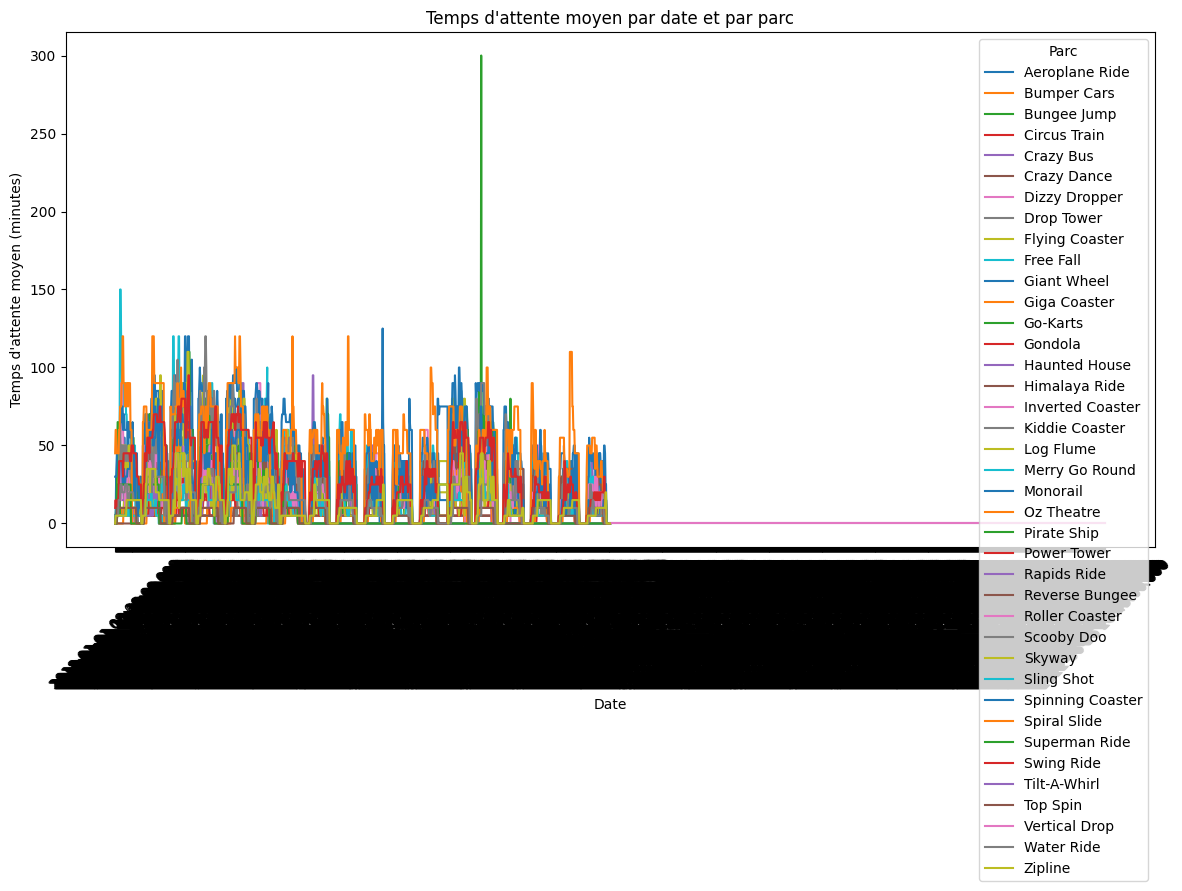

In [159]:
parc = ['Aeroplane Ride', 'Scooby Doo', 'Go-Karts', 'Roller Coaster',
       'Gondola', 'Haunted House', 'Reverse Bungee', 'Giga Coaster',
       'Himalaya Ride', 'Inverted Coaster', 'Power Tower',
       'Kiddie Coaster', 'Pirate Ship', 'Log Flume', 'Oz Theatre',
       'Rapids Ride', 'Skyway', 'Giant Wheel', 'Sling Shot', 'Zipline',
       'Bungee Jump', 'Water Ride', 'Circus Train', 'Top Spin',
       'Crazy Bus', 'Swing Ride', 'Crazy Dance', 'Superman Ride',
       'Dizzy Dropper', 'Drop Tower', 'Spiral Slide', 'Flying Coaster',
       'Spinning Coaster', 'Free Fall', 'Merry Go Round', 'Monorail',
       'Bumper Cars', 'Tilt-A-Whirl', 'Vertical Drop']


# Trier le DataFrame par date pour s'assurer que le graphique est bien ordonné
grouped.sort_values(by='DEB_TIME', inplace=True)

# Créer un graphique pour chaque parc
plt.figure(figsize=(12, 8))

for parc, df_parc in grouped.groupby('ENTITY_DESCRIPTION_SHORT'):
    plt.plot(df_parc['DEB_TIME'][:1000], df_parc['WAIT_TIME_MAX'][:1000], label=parc)

plt.title('Temps d\'attente moyen par date et par parc')
plt.xlabel('Date')
plt.ylabel('Temps d\'attente moyen (minutes)')
plt.legend(title='Parc')
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la disposition pour ne pas couper les labels
plt.show()